<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-dataset" data-toc-modified-id="Load-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load dataset</a></span></li><li><span><a href="#Train-Word2Vec-model" data-toc-modified-id="Train-Word2Vec-model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Train Word2Vec model</a></span></li><li><span><a href="#Play-around" data-toc-modified-id="Play-around-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Play around</a></span></li><li><span><a href="#Visualize" data-toc-modified-id="Visualize-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Visualize</a></span></li></ul></div>

In [1]:
import numpy as np
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Load dataset

In [2]:
# sentences = []
# with open('./data/news_corpus_tokenize.txt', 'r', encoding='utf-8') as file:
#     for line in file:
#         sentences.append(line.split())

In [3]:
# sentences[:3]

# Train Word2Vec model

- vector_size: Dimensionality of the word vectors. Default: 100.
- window: Maximum distance between the current and predicted word within a sentence. Default: 5.
- min_count: Ignores all words with total frequency lower than this. Default: 5.
- workers: Use these many worker threads to train the model (=faster training with multicore machines). Default: 3
- sg: Training algorithm: 1 for skip-gram; otherwise CBOW. The default training algorithm is CBOW.

In [4]:
# model = Word2Vec(sentences, vector_size=50, window=3, min_count=10, workers=12, sg=1)

In [5]:
# model.save("saved_models/word2vec_news.model")

In [2]:
model = Word2Vec.load("saved_models/word2vec_news.model")

# Play around

In [7]:
model.wv.most_similar('Todai')[:10]

[('đại_học', 0.8292111158370972),
 ('Hanyang', 0.8209556341171265),
 ('Gilmer', 0.799005389213562),
 ('hàm_thụ', 0.7988263964653015),
 ('Berklee', 0.7985203862190247),
 ('thỉnh_giảng', 0.7903547286987305),
 ('Morehouse', 0.7830025553703308),
 ('tốt_nghiệp', 0.7825169563293457),
 ('Vassar', 0.7818542718887329),
 ('Llandrillo', 0.7793876528739929)]

In [8]:
def analogy(x1, x2, y1):
    result = model.wv.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [9]:
analogy('tiểu_học', 'học_sinh', 'đại_học')

'sinh_viên'

In [10]:
analogy('một', 'thủ_khoa', 'hai')

'á_khoa'

In [11]:
analogy('Galaxy', 'Samsung', 'iPhone')

'Apple'

In [12]:
analogy('nặng_nhọc', 'làm_việc', 'thư_giãn')

'nghỉ_ngơi'

In [13]:
analogy('cô_giáo', 'phụ_nữ', 'thầy_giáo')

'đàn_ông'

In [14]:
analogy('trưởng_phòng', 'bộ_trưởng', 'phó_phòng')

'thứ_trưởng'

# Visualize

In [15]:
def display_closestwords_tsnescatterplot(model, word, size):
    
    arr = np.empty((0,size), dtype='f')
    word_labels = [word]
    close_words = model.wv.similar_by_word(word)
    arr = np.append(arr, np.array([model.wv[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model.wv[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)
    
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
        plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
        plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

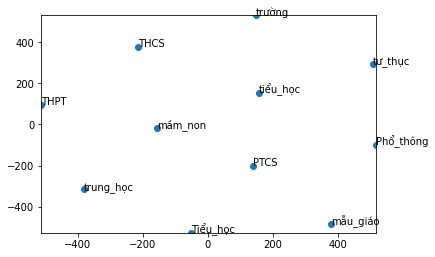

In [16]:
display_closestwords_tsnescatterplot(model, 'tiểu_học', 50)